Data Analysis (https://www.kaggle.com/code/tobby1177/diamond-price-modelling/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Load the diamond's dataset
df = pd.read_csv("XY_diamonds.csv")

In [2]:
vX = df.query('price!=price').drop('price', axis=1)  # slice a test sample
tXY = df.query('price==price')                       # slice training sample
tX, tY = tXY.drop('price', axis=1), tXY.price        # split into training I/O

In [3]:
tXY.head()

,carat,depth,table,x,y,z,cut,color,clarity,price
40000,0.36,69.5,61.3,4.585,4.521,2.842,P,H,VS1,714.0
40001,0.87,70.7,56.3,6.686,6.737,4.188,I,G,VS2,7504.0
40002,0.54,67.2,65.8,6.153,6.177,3.747,V,D,SI2,1368.0
40003,0.30,69.6,69.8,5.146,5.110,3.099,P,D,VS2,923.0
40004,0.60,68.6,49.4,4.884,4.910,2.961,P,E,SI1,2873.0


In [4]:
tXY.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160000 entries, 40000 to 199999
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    160000 non-null  float64
 1   depth    160000 non-null  float64
 2   table    160000 non-null  float64
 3   x        160000 non-null  float64
 4   y        160000 non-null  float64
 5   z        160000 non-null  float64
 6   cut      160000 non-null  object 
 7   color    160000 non-null  object 
 8   clarity  160000 non-null  object 
 9   price    160000 non-null  float64
dtypes: float64(7), object(3)
memory usage: 13.4+ MB


In [5]:
tXY["cut"].value_counts()

cut
I    63854
P    41011
V    35786
G    14572
F     4777
Name: count, dtype: int64

In [6]:
tXY["color"].value_counts()

color
G    33766
E    29180
F    28208
H    24320
D    20172
I    16150
J     8204
Name: count, dtype: int64

In [7]:
tXY["clarity"].value_counts()

clarity
SI1     39005
VS2     36314
SI2     27110
VS1     24109
VVS2    15110
VVS1    10708
IF       5344
I1       2300
Name: count, dtype: int64

In [8]:
tXY.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
carat,160000.0,0.80,0.49,0.16,0.39,0.68,1.07,5.76
depth,160000.0,67.86,2.53,45.60,65.90,67.80,69.80,86.60
table,160000.0,57.45,7.02,36.40,51.60,57.40,63.10,96.10
x,160000.0,5.73,1.31,0.00,4.73,5.57,6.63,11.79
y,160000.0,5.74,1.33,0.00,4.74,5.57,6.62,65.41
z,160000.0,3.54,0.81,0.00,2.92,3.44,4.09,8.95
price,160000.0,4487.57,4749.94,329.00,987.75,2574.00,6160.25,23566.00


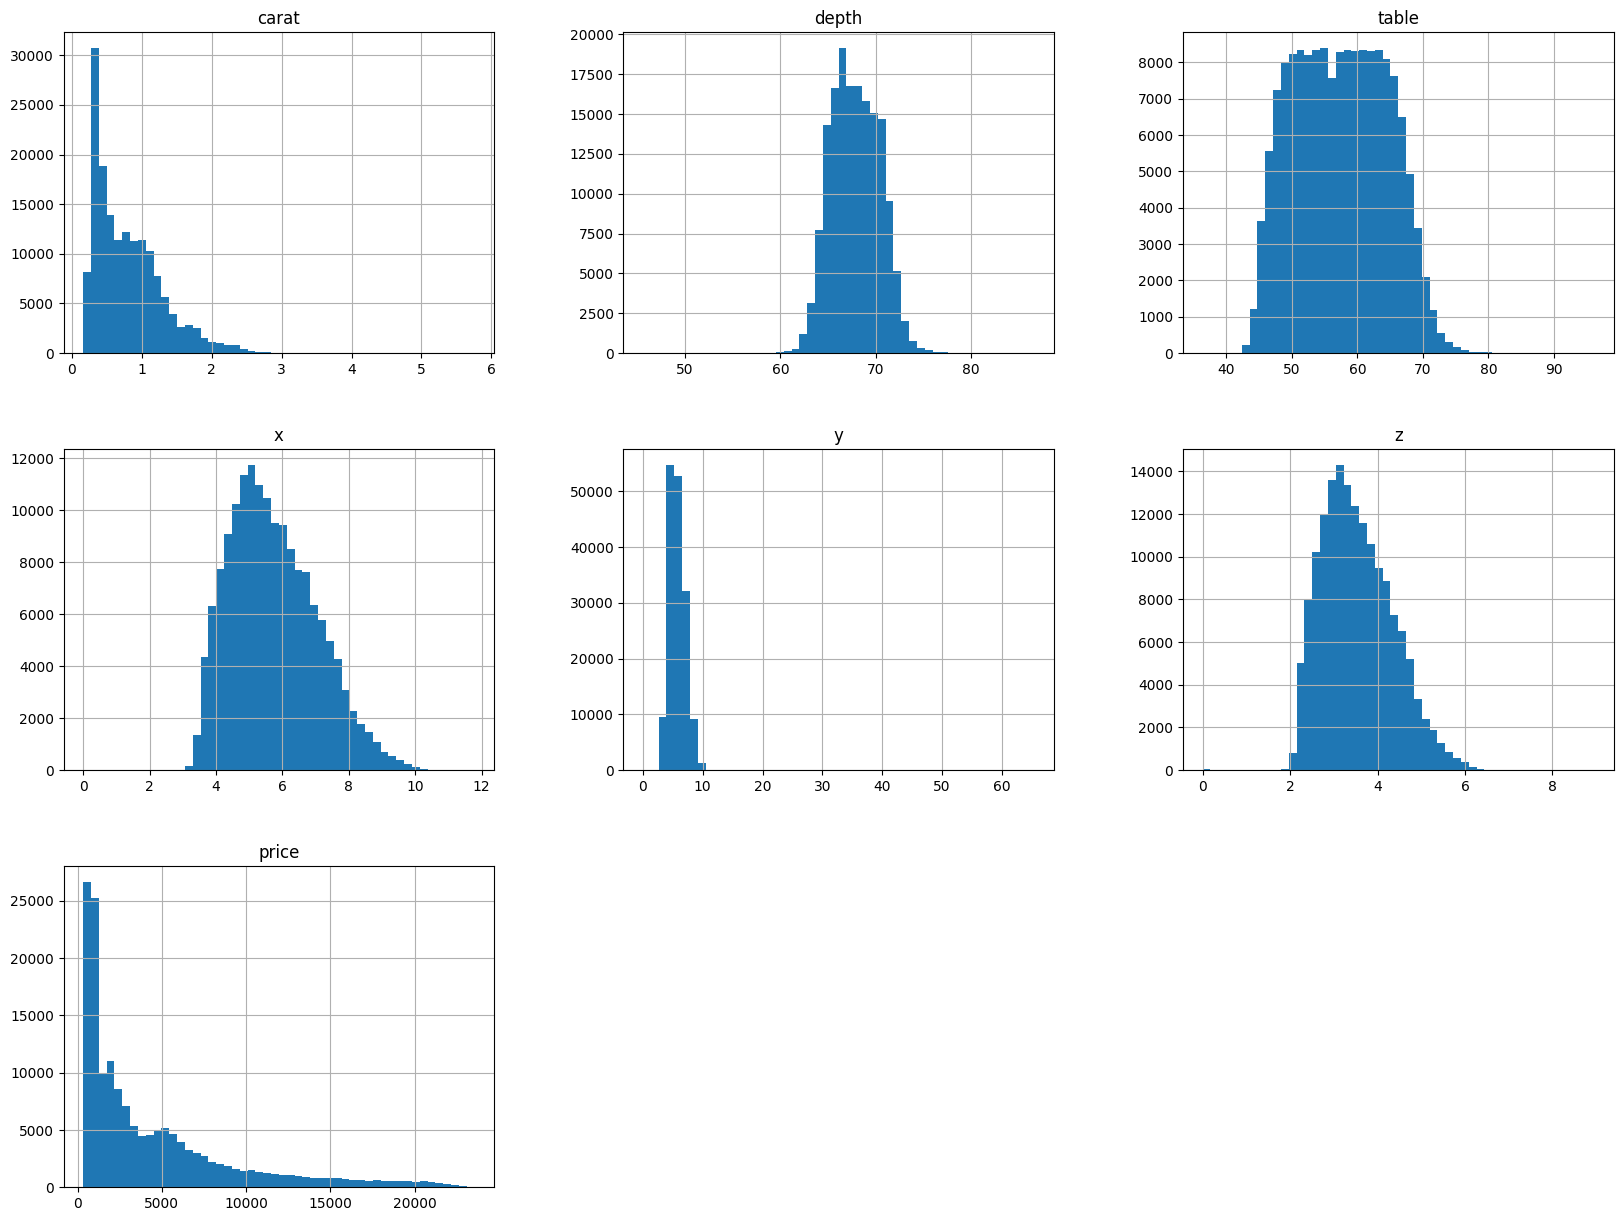

In [9]:
tXY.hist(bins = 50, figsize = (20, 15))
plt.show()

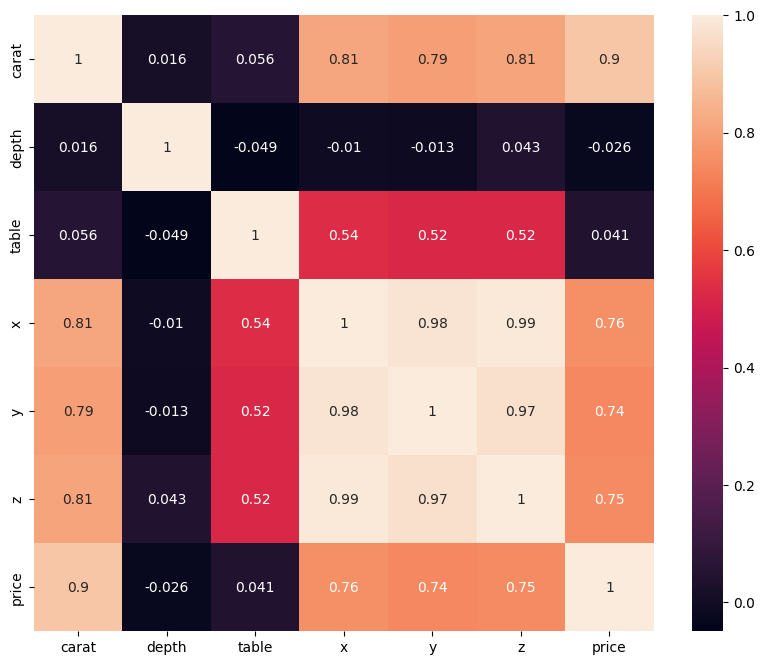

In [10]:
# Create a correlation matrix between every pair of attributes
corr_matrix = tXY.corr(numeric_only=True)

# Plot the correlation with seaborn
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

- x, y, z have strong correlation with price (~0.75);
- carat has even stronger correlation (~0.9);
- table and depth have close to 0 correlation with price.

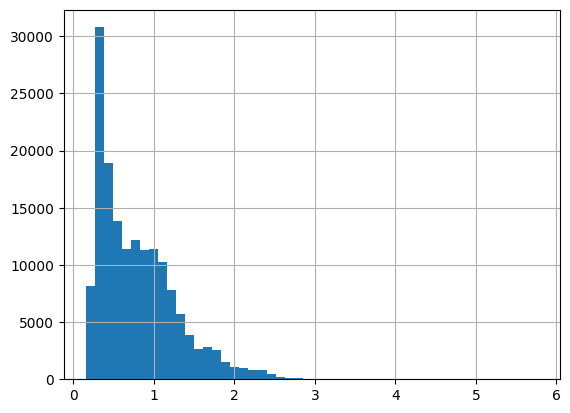

In [11]:
tXY["carat"].hist(bins = 50)
plt.show()

In [12]:
# Divide the diamond carats by 0.4 to limit the number of carat categories
# Round up to have discrete categories
tXY["carat_cat"] = np.ceil(tXY["carat"] / 0.35)

# Merge categories > 5 in 5
tXY["carat_cat"].where(tXY["carat_cat"] < 5, 5.0, inplace = True)

In [13]:
tXY["carat_cat"].value_counts()

carat_cat
2.0    51208
3.0    34646
1.0    31091
4.0    25225
5.0    17830
Name: count, dtype: int64

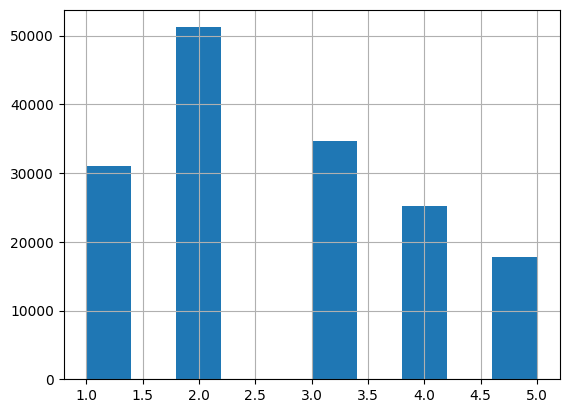

In [14]:
tXY["carat_cat"].hist()
plt.show()

In [15]:
# Import the sklearn module
from sklearn.model_selection import StratifiedShuffleSplit

# Run the split. Creates on split and shares 20% of the dataset for the test set
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

# Separate the stratified train set and the test set
for train_index, test_index in split.split(tXY, tXY["carat_cat"]):
    strat_train_set = tXY.loc[train_index+40000]
    strat_test_set = tXY.loc[test_index+40000]

<Axes: >

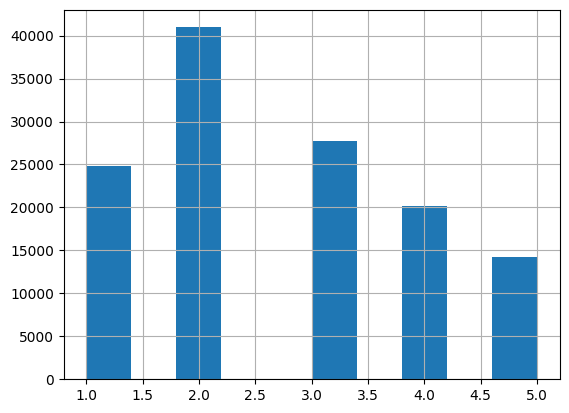

In [16]:
strat_train_set["carat_cat"].hist()

In [17]:
#we don't need the carat_cat anylonger, hence we can drop it
for set in (strat_train_set, strat_test_set):
    set.drop(["carat_cat"], axis = 1, inplace = True)

In [18]:
# Redefined diamonds dataset
df = strat_train_set.copy()
df.head()

,carat,depth,table,x,y,z,cut,color,clarity,price
97447,0.34,68.0,63.2,4.911,4.944,2.949,I,G,VS2,572.0
72478,0.39,69.6,60.7,4.664,4.707,2.918,I,G,VS1,682.0
181702,0.27,66.1,47.4,3.198,3.214,1.984,V,F,VS2,428.0
143458,0.33,65.1,46.7,3.577,3.609,2.256,V,D,SI1,656.0
138454,1.10,72.0,64.7,7.547,7.491,4.699,I,J,SI1,5382.0


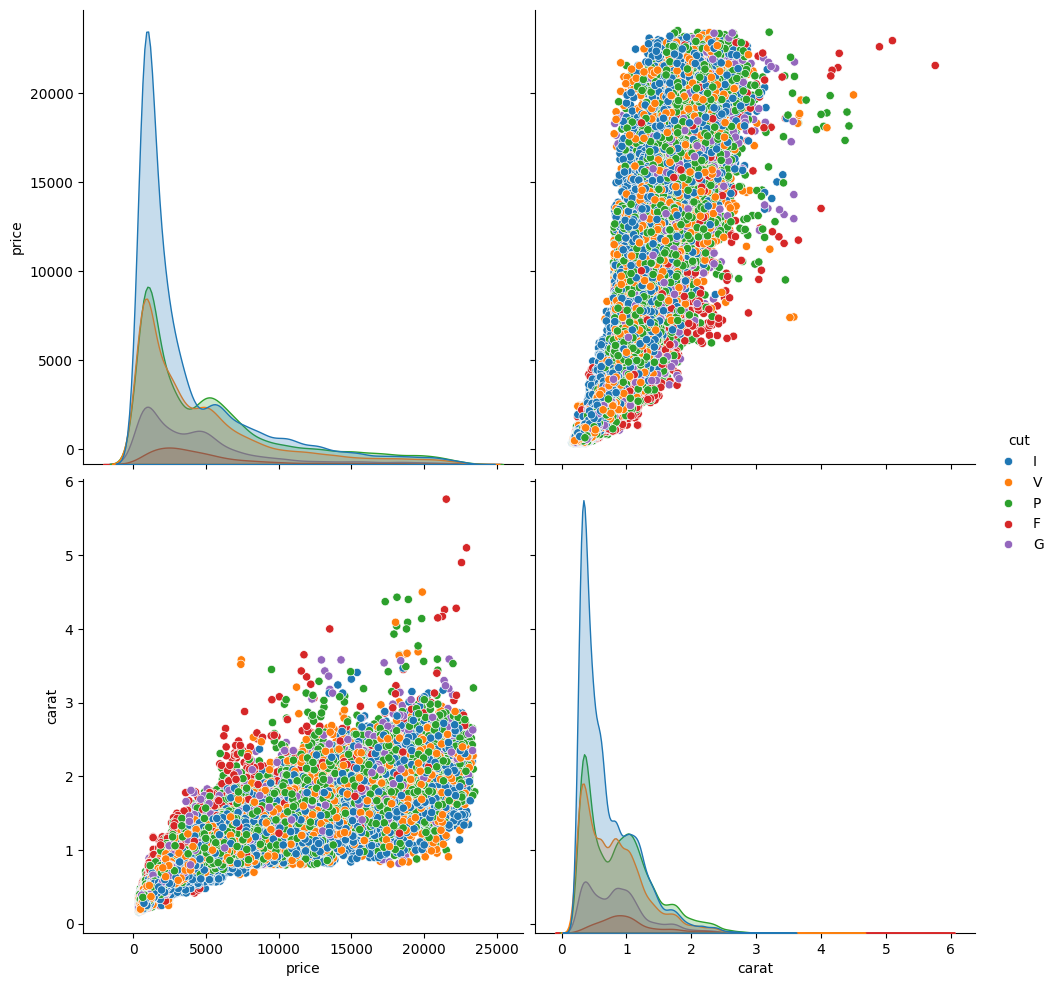

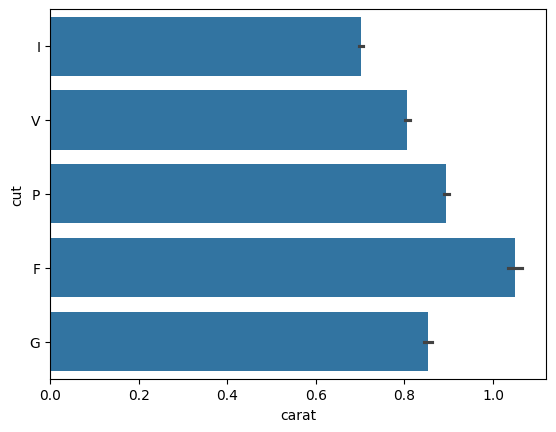

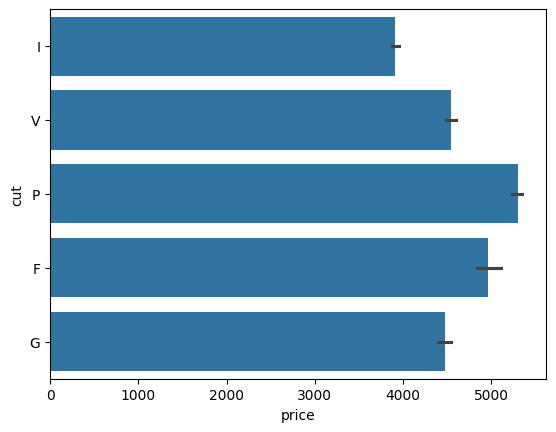

In [19]:
sns.pairplot(df[["price", "carat", "cut"]], hue = "cut", height = 5)
plt.show()
sns.barplot(x = "carat", y = "cut", data = df)
plt.show()
sns.barplot(x = "price", y = "cut", data = df)
plt.show()

Fair cuts are most weighed, but they aren't the most expensive diamonds.

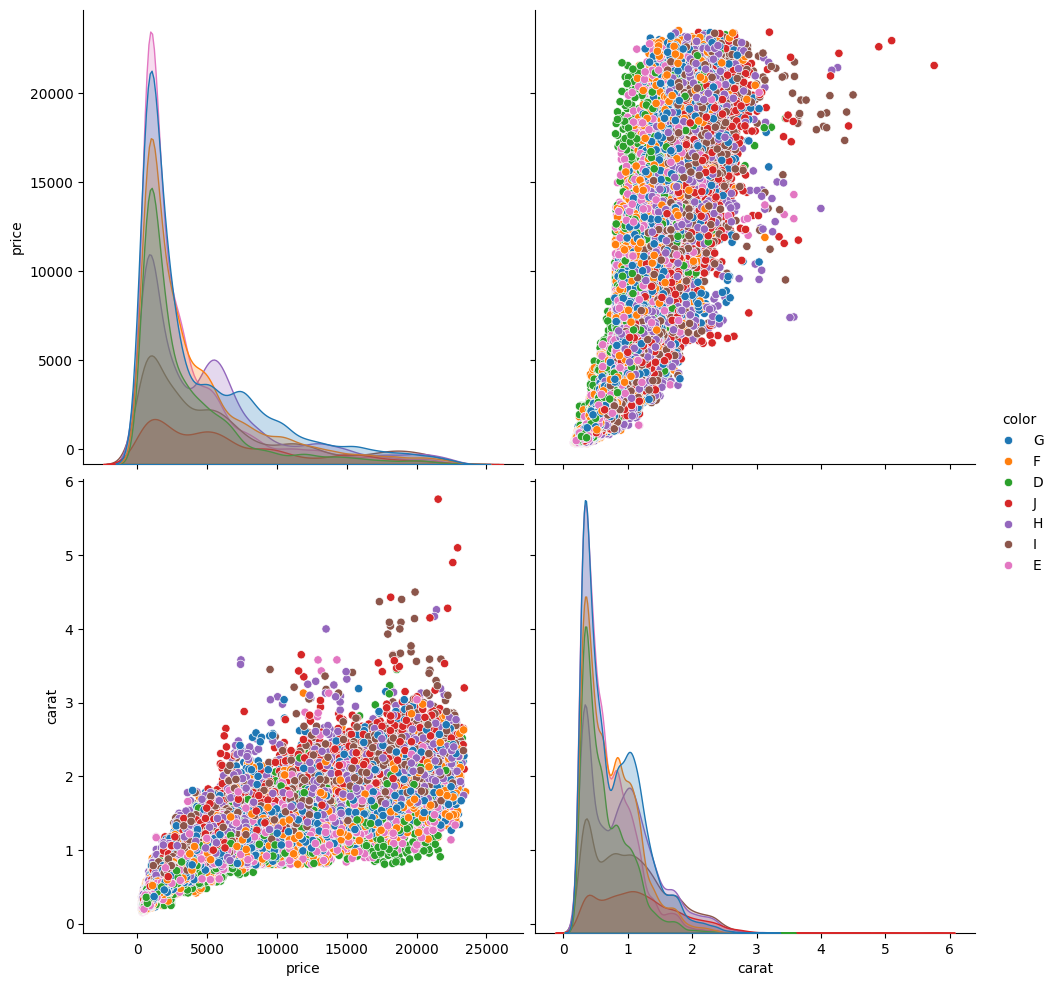

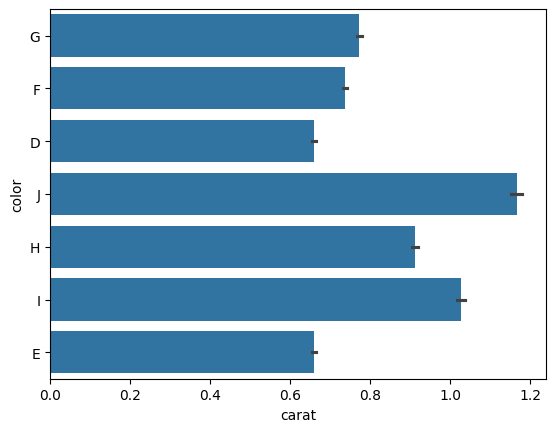

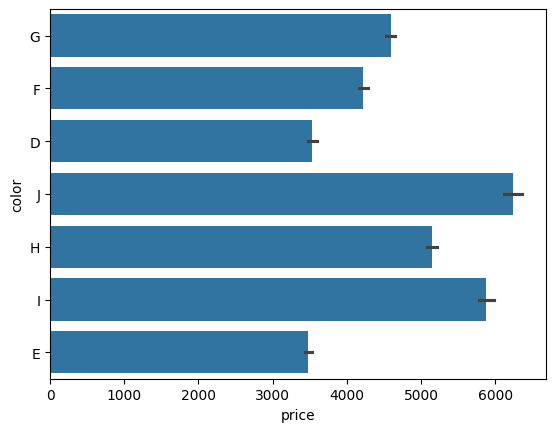

In [20]:
sns.pairplot(df[["price", "carat", "color"]], hue = "color", height = 5)
plt.show()
sns.barplot(x = "carat", y = "color", data = df)
plt.show()
sns.barplot(x = "price", y = "color", data = df)
plt.show()

Here, we could see that the color J which is the most weighed is also the most priced. The last 2 plots are very similar. We could see here that the color of the diamond is also very dependent on its price.

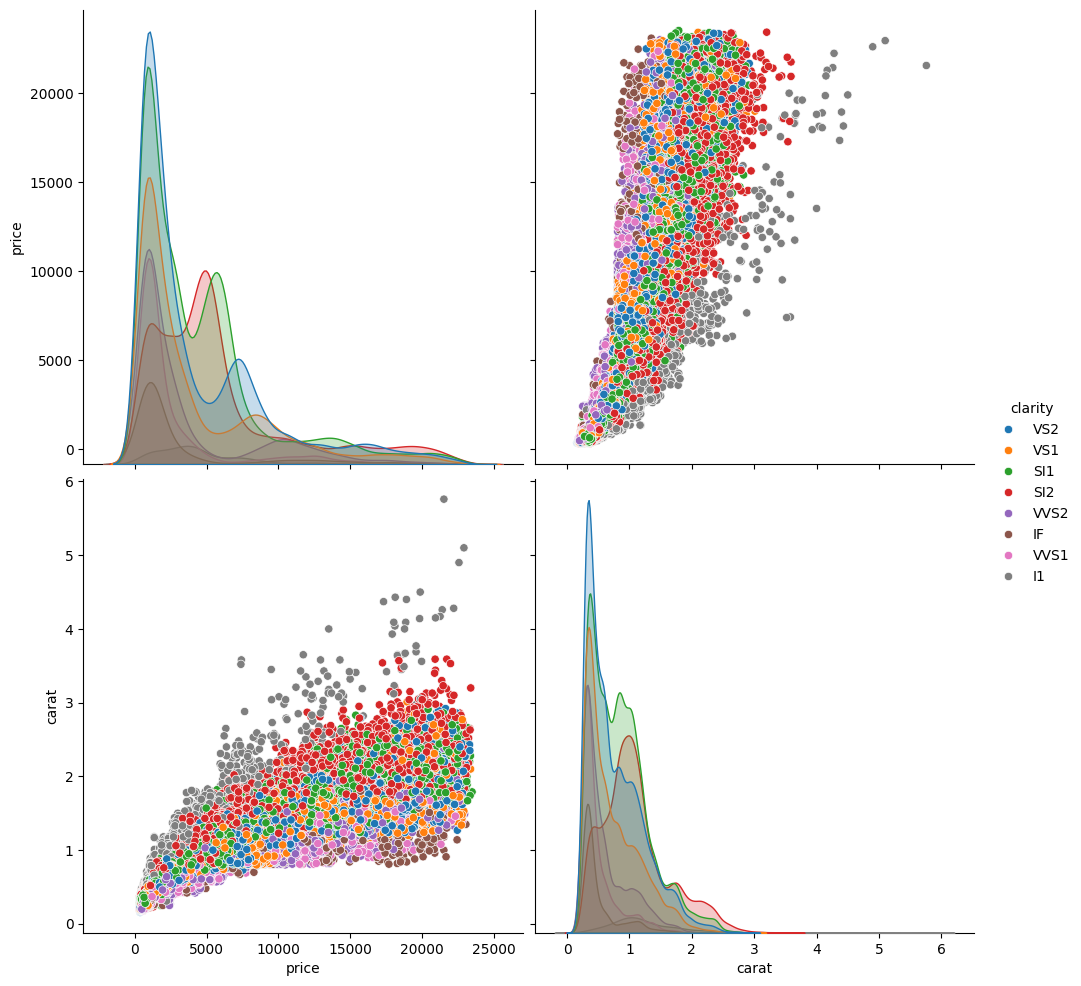

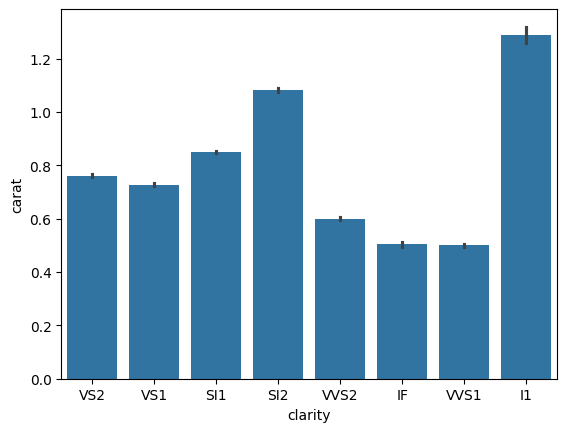

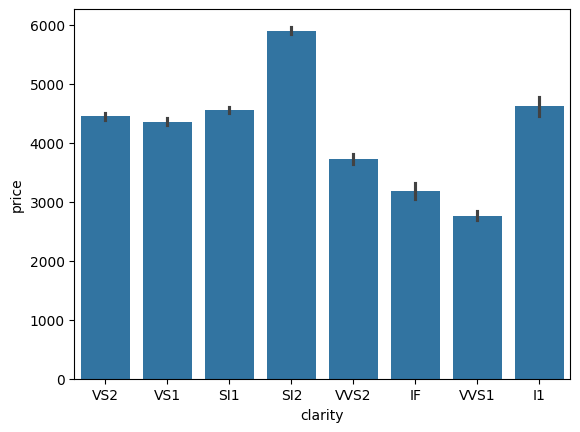

In [21]:
sns.pairplot(df[["price", "carat", "clarity"]], hue = "clarity", height = 5)
plt.show()
sns.barplot(y = "carat", x = "clarity", data = df)
plt.show()
sns.barplot(y = "price", x = "clarity", data = df)
plt.show()

"Here, we could see that I1 doesn't hold the highest clarity, even though it is the most priced. But there's something else: Apart from I1, if the rest stays, the price of a diamond could fairly be relative to its clarity, to some extent."

WTF?
- As I see it, here I1 are the heaviest caratwise, but not as expensive.
Overall: more carats = higher price, except to I1

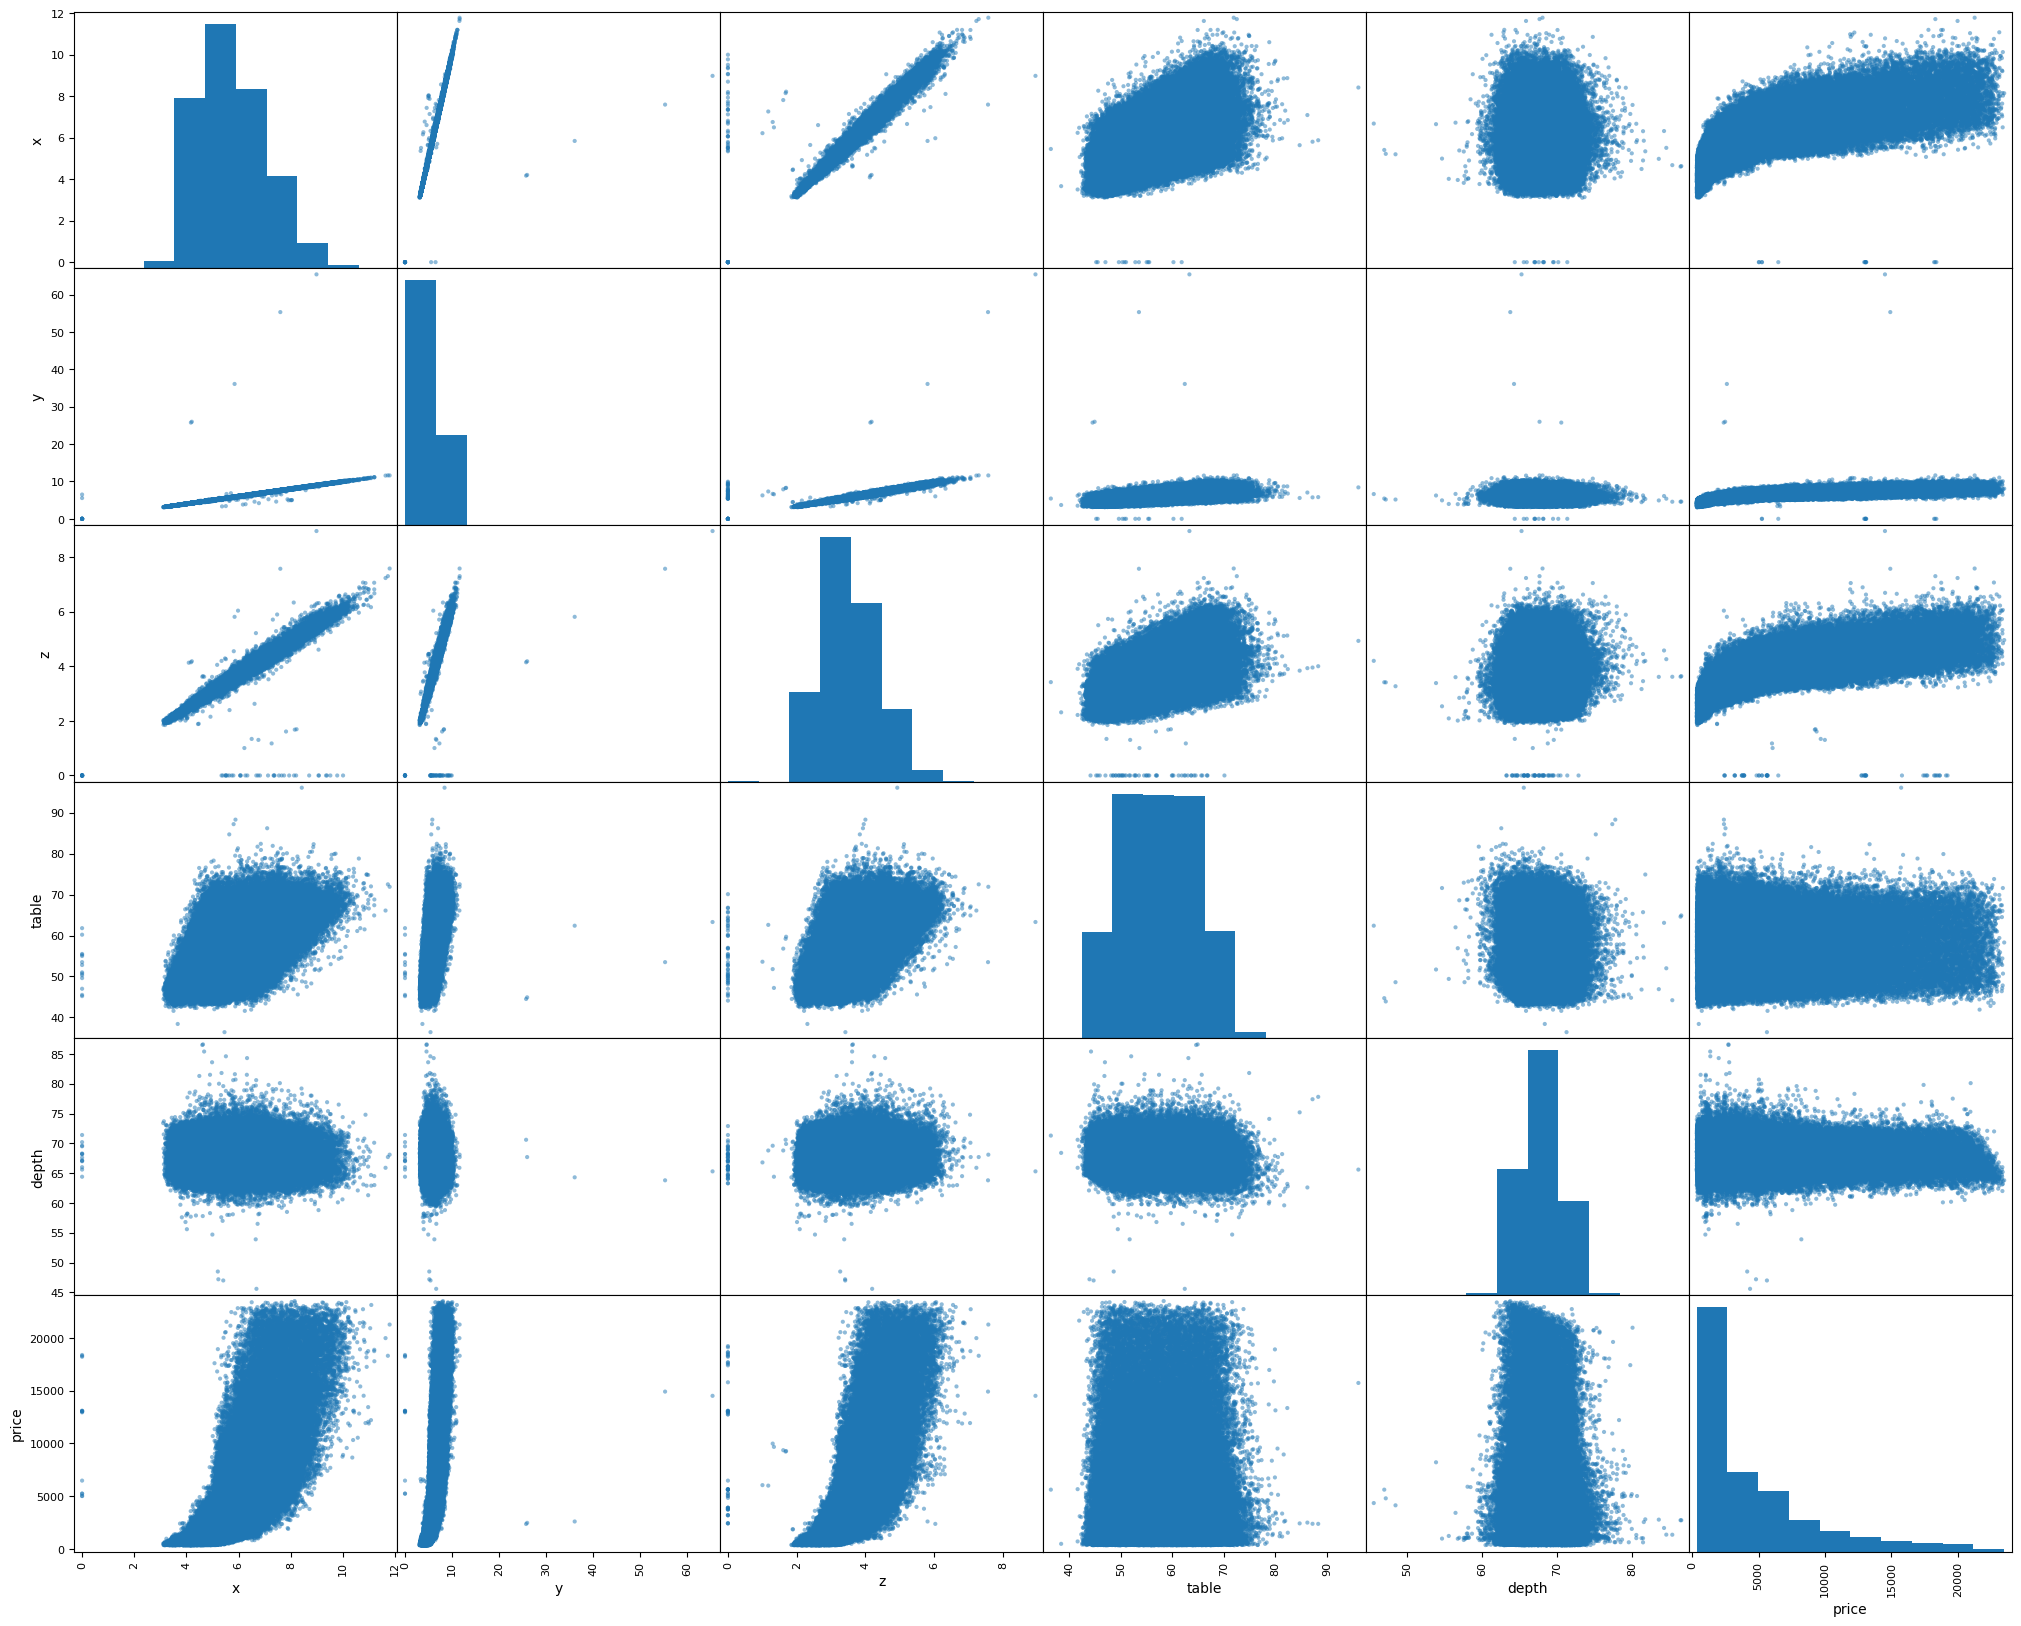

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["x", "y", "z", "table", "depth", "price"]
scatter_matrix(df[attributes], figsize=(25, 20))
plt.show()

Depth and table have very weak correlation with price.

Feature Scaling

In [23]:
# Do not stratify the label
train_set = strat_train_set.drop("price", axis = 1)

# Set a new dataset label variable
train_set_Y = strat_train_set["price"].copy()

# Drop all the category, so we could have only numeric
train_set_numeric = train_set.drop(["cut", "color", "clarity"], axis = 1)
train_set_numeric.head()

,carat,depth,table,x,y,z
97447,0.34,68.0,63.2,4.911,4.944,2.949
72478,0.39,69.6,60.7,4.664,4.707,2.918
181702,0.27,66.1,47.4,3.198,3.214,1.984
143458,0.33,65.1,46.7,3.577,3.609,2.256
138454,1.10,72.0,64.7,7.547,7.491,4.699


In [24]:
from sklearn.preprocessing import StandardScaler

# Perform the feature scaling on the numeric attributes of the dataset
scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set_numeric)

# Preview 
pd.DataFrame(train_set_scaled).head()

,0,1,2,3,4,5
0,-0.944760,0.055748,0.819258,-0.629504,-0.599453,-0.729938
1,-0.841806,0.689397,0.462981,-0.818398,-0.778524,-0.768216
2,-1.088895,-0.696711,-1.432411,-1.939525,-1.906594,-1.921475
3,-0.965350,-1.092742,-1.532169,-1.649683,-1.608143,-1.585622
4,0.620139,1.639871,1.033024,1.386383,1.324992,1.430878


Categorical Features

In [25]:
# We need only the category attributes to work with here
train_set_categorical = train_set[["cut", "color", "clarity"]]
train_set_categorical.head()

,cut,color,clarity
97447,I,G,VS2
72478,I,G,VS1
181702,V,F,VS2
143458,V,D,SI1
138454,I,J,SI1


In [26]:
from sklearn.preprocessing import OneHotEncoder

# Perform the one-hot encoding on the category attributes of the dataset
cat_encoder = OneHotEncoder()
train_set_cat_encoded = cat_encoder.fit_transform(train_set_categorical)

# Convert the encoded categories to arrays and Preview
pd.DataFrame(train_set_cat_encoded.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.compose import ColumnTransformer

num_attribs = list(train_set_numeric)
cat_attribs = ["cut", "color", "clarity"]

# Pipeline to transform our dataset
pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs), # Perform feaured scaling on numeric attributes
    ("cat", OneHotEncoder(), cat_attribs) # Perform One-Hot encoding on the category attributes
])

In [28]:
# Transformed dataset to feed the ML Algorithm
train_set_X = pipeline.fit_transform(train_set)

# Preview
pd.DataFrame(train_set_X).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.944760,0.055748,0.819258,-0.629504,-0.599453,-0.729938,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.841806,0.689397,0.462981,-0.818398,-0.778524,-0.768216,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.088895,-0.696711,-1.432411,-1.939525,-1.906594,-1.921475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.965350,-1.092742,-1.532169,-1.649683,-1.608143,-1.585622,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.620139,1.639871,1.033024,1.386383,1.324992,1.430878,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Selecting a model

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from random import randint

# Our test set

# Remove label from test set
X_test = strat_test_set.drop("price", axis = 1)
# Have label stand alone
y_test = strat_test_set["price"].copy()

# Our models performance holder
models_rmse = [] # Holds Models original RMSE
cvs_rmse_mean = [] # Holds the Cross Validation RMSE Mean
tests_rmse = [] # Holds the tests RMSE
tests_accuracy = [] # Holds the tests accuracy
models = [] # Holds the models name

def display_model_performance(model_name, model, diamonds = train_set_X, 
                              labels = train_set_Y, models_rmse = models_rmse, 
                              cvs_rmse_mean = cvs_rmse_mean, tests_rmse = tests_rmse,
                              tests_accuracy = tests_accuracy, pipeline = pipeline, 
                              X_test = X_test, y_test = y_test, cv = True):
    # Fit dataset in model
    #print(diamonds.head())
    model.fit(diamonds, labels)
    
    # Setup predictions
    predictions = model.predict(diamonds)
    
    # Get models performance
    model_mse = mean_absolute_error(labels, predictions)
    model_rmse = np.sqrt(model_mse)
    
    # Cross validation
    cv_score = cross_val_score(model, diamonds, labels, scoring = "neg_mean_squared_error", cv = 10)
    cv_rmse = np.sqrt(-cv_score)
    cv_rmse_mean = cv_rmse.mean()
    
    print("MAE: %.4f" %model_mse)
    models_rmse.append(model_mse)
    
    print("CV-RMSE: %.4f" %cv_rmse_mean)
    cvs_rmse_mean.append(cv_rmse_mean)
    
    print("--- Test Performance ---")
    
    X_test_prepared = pipeline.transform(X_test)
    
    # Fit test dataset in model
    model.fit(X_test_prepared, y_test)
    
    # Setup test predictions
    test_predictions = model.predict(X_test_prepared)
    
    # Get models performance on test
    test_model_mse = mean_absolute_error(y_test, test_predictions)
    test_model_rmse = np.sqrt(test_model_mse)
    print("MAE: %.4f" %test_model_mse)
    tests_rmse.append(test_model_rmse)
    
    # Tests accuracy
    test_accuracy = round(model.score(X_test_prepared, y_test) * 100, 2)
    print("Accuracy:", str(test_accuracy)+"%")
    tests_accuracy.append(test_accuracy)
    
    # Check how well model works on Test set by comparing prices
    start = randint(1, len(y_test))
    some_data = X_test.iloc[start:start + 7]
    some_labels = y_test.iloc[start:start + 7]
    some_data_prepared = pipeline.transform(some_data)
    print("Predictions:\t", model.predict(some_data_prepared))
    print("Labels:\t\t", list(some_labels))
    
    models.append(model_name)
    
    # Preview plot
    plt.scatter(train_set_Y, model.predict(train_set_X))
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    plt.plot(x_lim, y_lim, "k--")
    plt.show()
    
    print("------- Test -------")
    plt.scatter(y_test, model.predict(X_test_prepared))
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot(x_lim, y_lim, "k--")
    plt.show()

MAE: 1232.5866
CV-RMSE: 1724.0793
--- Test Performance ---
MAE: 1223.1393
Accuracy: 86.72%
Predictions:	 [ 7402.49155897  1961.30905615  2517.20503845  5720.74527134
  4057.64362357 -1829.66440781 10480.33709843]
Labels:		 [5625.0, 1686.0, 2337.0, 3577.0, 3146.0, 413.0, 12061.0]


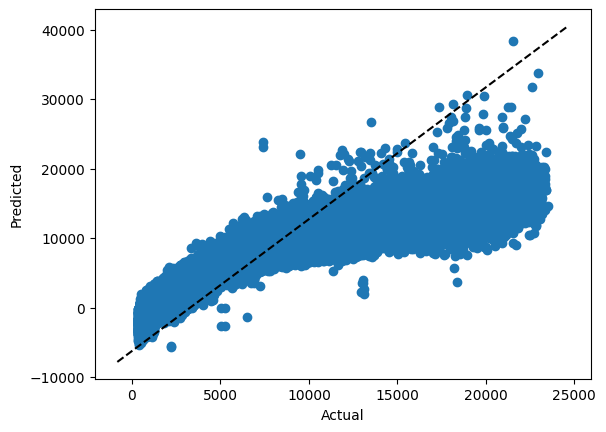

------- Test -------


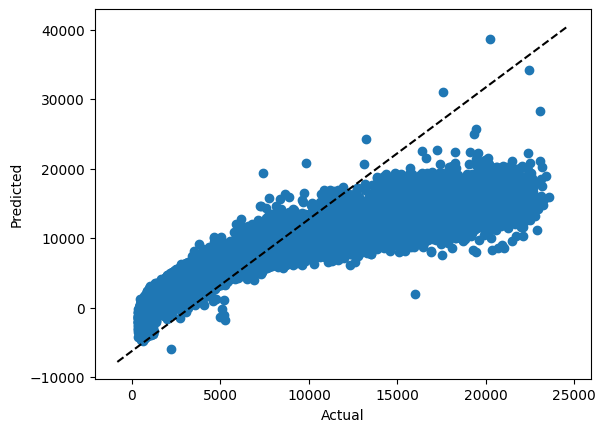

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
display_model_performance("Linear Regression", lin_reg)

MAE: 1232.6233
CV-RMSE: 1724.0621
--- Test Performance ---
MAE: 1223.0223
Accuracy: 86.72%
Predictions:	 [   17.77179328  -783.56174366 -1153.46461055  -888.13785834
  2175.38608831    12.62294478  9735.6228887 ]
Labels:		 [637.0, 537.0, 861.0, 409.0, 1303.0, 543.0, 6053.0]


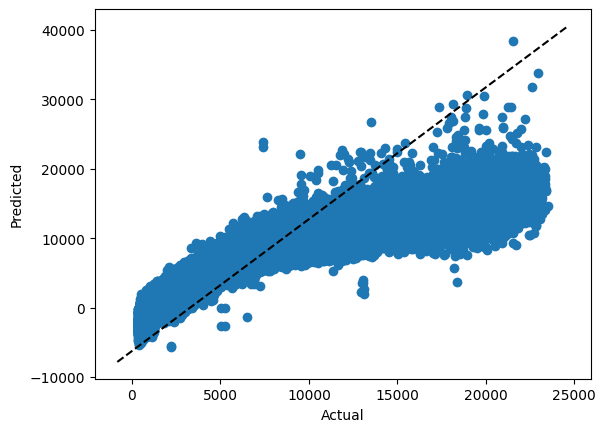

------- Test -------


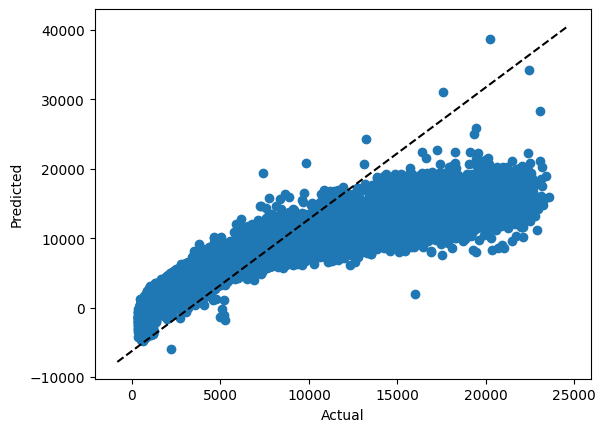

In [38]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
display_model_performance("Ridge Regression", ridge_reg)

MAE: 1230.2944
CV-RMSE: 1724.1578
--- Test Performance ---
MAE: 1220.7806
Accuracy: 86.72%
Predictions:	 [-719.84408196 2438.42478393 1930.74902425 7664.73711145 1150.41703905
 8669.21560679 5804.98711399]
Labels:		 [622.0, 1711.0, 906.0, 7182.0, 804.0, 10759.0, 3440.0]


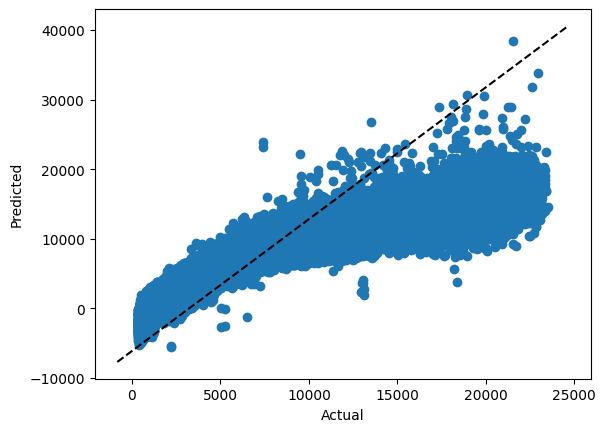

------- Test -------


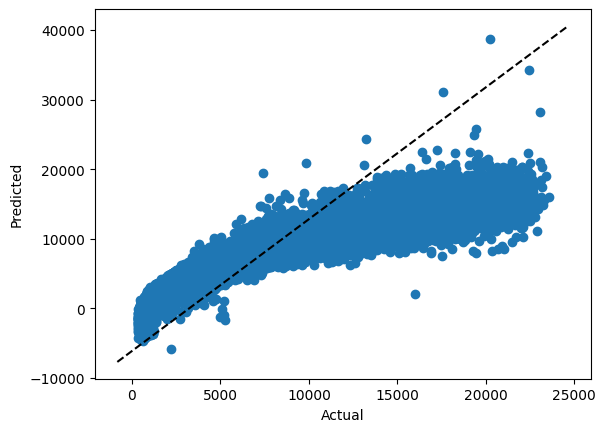

In [39]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
display_model_performance("Lasso Regression", lasso_reg)

RMSE: 2223.8114
CV-RMSE: 2224.0125
--- Test Performance ---
RMSE: 2223.0094
Accuracy: 77.89%
Predictions:	 [  780.93011072   475.76200627  1409.1873726  14789.53302801
  6076.24762944  3523.80237819  2544.81961701]
Labels:		 [611.0, 1099.0, 1223.0, 16257.0, 5103.0, 1776.0, 1285.0]


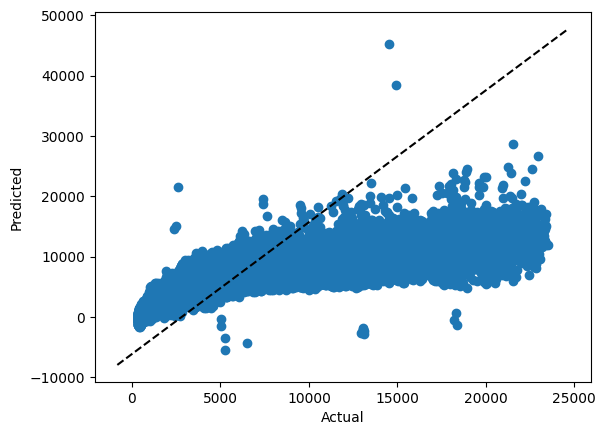

------- Test -------


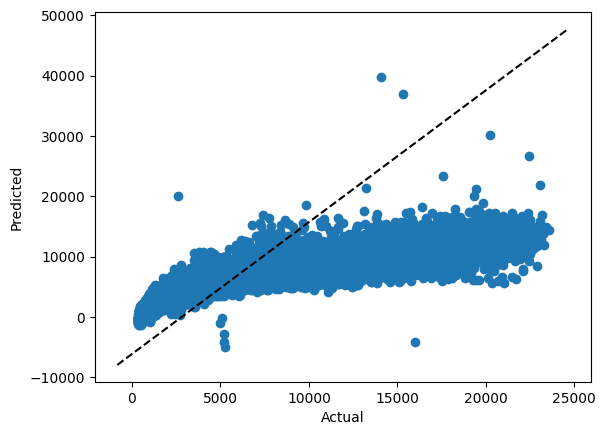

In [34]:
from sklearn.linear_model import ElasticNet

net_reg = ElasticNet()
display_model_performance("Elastic Net Regression", net_reg)

In [35]:
compare_models = pd.DataFrame({ "Algorithms": models, "Models RMSE": models_rmse, "CV RMSE Mean": cvs_rmse_mean,
                              "Tests RMSE": tests_rmse, "Tests Accuracy": tests_accuracy })
compare_models.sort_values(by = "Tests Accuracy", ascending = False)

,Algorithms,Models RMSE,CV RMSE Mean,Tests RMSE,Tests Accuracy
0,Linear Regression,1723.459837,1724.079330,1722.608698,86.72
1,Ridge Regression,1723.455985,1724.062107,1722.609191,86.72
2,Lasso Regression,1723.545451,1724.157835,1722.695874,86.72
3,Elastic Net Regression,2223.811386,2224.012464,2223.009422,77.89
